# ADP 통계 기출 28회 ~ 25회

In [12]:
import pandas as pd
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

---

# [ 28회 ]

## < 28회 1번 : 카플란 마이어 생존분석 >
카플란 마이어 생존분석을 수행하라
1. 시간별, 제조사별 불량률을 분석하라
2. 25, 30, 35년 후에 불량률은?
3. log ranktest를 이용하여 두 제조사별 유의미한 차이가 있는지 검정하라


### 접근 방법
#### 생존분석(Survival Analysis)
- 시간에 따른 사건 발생 여부를 분석하는 통계적인 방법론
- 사건 발생까지의 시간을 예측하거나 그룹 간의 생존 시간 비교 등을 수행

## < 28회 2번 : 윌콕슨 순위합 검정 / 만 위트니 U검정 >
두 고등학교 성적 분포 차이
- A 고등학교 12명, B 고등학교 24명
- 샘플이 30보다 작음

### 접근 방법
#### 독립 이표본의 비모수 검정
1. 두 고등학교 $\rightarrow$ 이표본, 독립
    - 두 고등학교 모두 샘플이 30개보다 작음
<br></br>
2. B 고등학교에서 정규성 검정을 위해 shapiro test -> p 값이 통계적으로 유의
3. **만 위트니 U검정 / 윌콕슨 순위합 검정(Wilcoxon rank-sum test)** 사용 (얘가 실제 시험 풀이)

- 데이터 없으므로 흐름 참고 !
```Python
# 정규성 검정
print('정규성 검정 상류:', stats.shapiro(df_river['up']))
print('정규성 검정 하류:', stats.shapiro(df_river['down']))
# 결과에 따라 정규성 여부 판단
``` 
- shapiro 정규성 검정 가설
    - 귀무가설 : 정규분포를 따른다.
    - 대립가설 : 정규분포를 따르지 않는다.
<br></br>
- 정규성을 따른다면 독립표본 t검정
- 정규성을 위배한다면 윌콕슨 검정

### 가설
- 귀무가설 : 두 고등학교 성적 분포 차이가 없다.
- 대립가설 : 두 고등학교 성적 분포 차이가 있다.

In [6]:
from scipy.stats import mannwhitneyu

# 두 그룹의 데이터 예시
group1 = [12, 15, 17, 18, 20]
group2 = [10, 11, 14, 16, 19]

# 만 위트니 U 검정 실행
# 제공되는 데이터는 df형식일테니 df["group1"] 이런식으로 넣자
statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

# 결과 출력
print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 18.0
p-value: 0.30952380952380953


In [8]:
from scipy.stats import ranksums

# 두 그룹의 데이터 예시
group1 = [12, 15, 17, 18, 20]
group2 = [10, 11, 14, 16, 19]

# 윌콕슨 순위합 검정 실행
statistic, p_value = ranksums(group1, group2) # 디폴트 양방검정

# 결과 출력
print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 1.1489125293076057
p-value: 0.25059205068568424


## < 28회 3번 : 맥니마 검정 - 대응 2표본, 범주형 >
시식 전 후 구매 의도를 가진 사람 비율 차이 검정 (교차표 형식으로 표 그림 제공)
```
[예시 데이터 확인]
              시식_전  시식_후
구매의도_있음     9    12
구매의도_없음    24    35
```

In [50]:
import pandas as pd
 
table = pd.DataFrame([[9,12], [24,35]], 
                     index=["구매의도_있음", "구매의도_없음"], 
                     columns=["시식_전", "시식_후"])
table

,시식_전,시식_후
구매의도_있음,9,12
구매의도_없음,24,35


### 접근 방법
-  2개의 대응 표본을 가지고 범주형 변수의 분포가 변화했는지 검정 : 맥네마

#### Examples
80명을 모집해 프로모션 이벤트를 열고, 이벤트 전후로 상품에 흥미가 있는지를 설문조사하여 얻은 결과가 다음과 같다. 흥미를 갖다가 사라진 사람보다 흥미를 갖지않다가 갖게 된 사람이 더 많았다. 이것이 우연인지 이벤트의 효과인지를 유의수준 0.05로 검정하라.

- 가설
    - H0 : 흥미가 없다가 있게 된 경우와 있다가 없게된 경우는 동일한 확률로 배분된다.
    - H1 : 흥미가 없다가 있게 된 경우와 있다가 없게된 경우는 동일한 확률로 배분되지 않는다.
    

투표권이 있는 나이의 미국인 1,600명에 대해 대통령 지지율을 조사한 결과로, 1st Survey와 2nd Survey는 한 달 간격으로 조사된 데이터이다.
- 가설
    - H0 : 1차 조사와 2차 조사의 Approve, Disapprove **비율은 같다.**
    - H1 : 1차 조사와 2차 조사의 Approve, Disapprove **비율은 다르다.**

### 3-1) 귀무가설과 대립가설을 세우시오.
- 귀무가설 : 시식 전, 후의 구매의도를 가진 사람의 비율은 같다.
- 대립가설 : 시식 전, 후의 구매의도를 가진 사람의 비율은 같지 않다.

### 3-2) 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.

In [56]:
# 라이브러리 검정
from statsmodels.stats.contingency_tables import mcnemar

mc = mcnemar(table.values,
             exact=False, # True -> 이항분포, False -> 카이제곱분포 사용
             correction=False) # correction=False는 연속성 보정 허용 X

print("McNemar's Chi-squared test")
print(mc)

# # 3f 소수점 이하 세자리까지
# print("검정통계량 {:3f}, p-value {:3f}".format(mc.statistic, mc.pvalue))

McNemar's Chi-squared test
pvalue      0.04550026389635857
statistic   4.0


#### p-value가 약 0.0455로 유의수준 0.05보다 작으므로, 귀무가설을 기각한다.
#### 따라서 시식 전, 후의 구매의도를 가진 사람의 비율은 같지 않다고 할 수 있다.

## < 28회 4번 : 편상관분석 >
1. 몸무게 제외 나이와 콜레스테롤 상관계수와 유의확률 구하기 (몸무게를 통제했을 때 콜레스테롤 지수와 나이의 영향이 있을까)
2. 0.05 하에서 검정 결과 제시 하기

In [30]:
# 임의적으로 만든 데이터
data = pd.read_csv("./df_pcor.csv")
data.head()

,age,weight,cholesterol
0,50,62.0,1
1,55,85.0,3
2,52,64.0,3
3,48,82.0,1
4,48,56.0,1


### 접근 방법
#### 편상관분석(Partial Correlation Analysis)
- 상관관계를 보는 것이므로 partial_corr함수에서 x, y 바꿔도 동일한 결과
- 콜레스테를 지수는 3개의 범주

#### 스피어만 상관계수
- 서열 척도로 측정된 데이터와 연속형 데이터 간의 상관계수를 계산 
<br></br>
- 참고 : ANCOVA?
    - 주 목적은 한 개의 '종속 변수를 설명'하기 위해 독립 변수와 공변량(covariate) 간의 관계를 조사하는 것
    - 그래서 본 문제는 '상관관계'라고 명시했으니 편상관분석을 하는게 맞음. 

## 4-1) 몸무게 제외 나이와 콜레스테롤 상관계수와 유의확률 구하기
$\rightarrow$몸무게를 통제했을 때 콜레스테롤 지수와 나이의 영향이 있을까

In [38]:
df["cholesterol"].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [34]:
import pingouin as pg

pg.partial_corr(data=data, 
                x='age', 
                y='cholesterol', 
                covar='weight', # 제어변수
                method='spearman') # 연속형 x 범주형 = 스피어만

,n,r,CI95%,p-val
spearman,50,0.182556,"[-0.1, 0.44]",0.209303


### 4-2) 0.05 하에서 검정 결과 제시 하기
#### p-value가 0.209303으로, 유의수준 0.05보다 크므로 통계적으로 유의한 상관관계가 없다고 할 수 있다.
#### 즉,  몸무게를 제어했을 때 콜레스테롤 지수와 나이 간의 상관관계는 통계적으로 유의미하지 않다고 할 수 있다.

---

# [ 27회 ]


## < 27회 1번  : 기하평균 >
2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 상승률의 대푯값을 구하시오 (반올림하여 소수점 아래 둘째자리까지 표기하라)

### 접근 방법
정규분포를 가정하고, 표본 수가 30건 미만이므로 t-분포를 사용하여 검정

## < 27회 2번 :  신뢰구간 >
12건의 광고 시간 측정. 평균 15.5초, 분산 3.2초 일때 90% 신뢰구간은?

### 접근 방법
정규분포를 가정하고, 표본 수가 30건 미만이므로 t-분포를 사용하여 검정

## < 27회 3번 : paired t-test, 대응표본 t검정 vs. 윌콕슨 부호순위검정 >
강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하시오. (단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)

1. 귀무가설과 대립가설을 세우시오
2. 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.


In [39]:
df_river = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/river.csv')
df_river.head()

,River,up,down
0,A,57.1,45.7
1,B,51.6,37.2
2,C,53.9,53.3
3,D,59.0,54.3
4,E,57.5,46.3


In [40]:
df_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   River   19 non-null     object 
 1   up      19 non-null     float64
 2   down    19 non-null     float64
dtypes: float64(2), object(1)
memory usage: 584.0+ bytes


### 접근 방법   
#### 1. 데이터 확인 후, 검정방법 결정
- t-분포를 사용하여 검정
- 같은 강, 상/하류간 종속 $\rightarrow$ 대응표본 검정

#### 2. 검정방법의 가정이 만족 하는지 확인
- 표본의 수가 30개 미만인 경우 $\rightarrow$ 정규성검정을 통해 정규성을 입증해야 함
    - t-검정에서는 중심극한정리를 사용하여 정규분포를 가정하기 때문에 표본의 수가 30개 이상 이어야 하기 때문
- 정규성검정이 기각 $\rightarrow$ 비모수적 방법 사용 (윌콕슨 순위합검정)
- 샘플 사이즈가 너무 작은 경우 $\rightarrow$ 정규성 검정 불가능

#### 3. 가정 확인
- 상/하류의 데이터(변수) 각각 정규성 검정
    - shapiro 정규성 검정 H0: 정규분포를 따른다.
    - shapiro 정규성 검정 H1: 정규분포를 따르지 않는다.
<br></br>
- 아래 샘플 데이터는 p값이 둘 다 0.05를 초과하여 정규성을 만족함. $\rightarrow$ paird t-test
- 실제 시험에선 하나가 정규성을 만족하지 못함 => 윌콕슨부호검정 해야함

### 3-1) 귀무가설과 대립가설을 세우시오.
- 귀무가설 : 강의 상류와 하류의 생물 다양성 점수에 차이가 없다.
- 대립가설 : 강의 상류와 하류의 생물 다양성 점수에 차이가 있다.

### 3-2) 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.

#### 정규성 검정

In [42]:
print('정규성 검정 상류:', stats.shapiro(df_river['up']))
print('정규성 검정 하류:', stats.shapiro(df_river['down']))

정규성 검정 상류: ShapiroResult(statistic=0.9635884165763855, pvalue=0.6447699666023254)
정규성 검정 하류: ShapiroResult(statistic=0.9821230173110962, pvalue=0.9640804529190063)


#### 이 데이터는 상류, 하류의 p-value가 유의수준 0.05보다 크므로 귀무가설을 기각하지 않는다.
#### 따라서 정규성을 따른다고 할 수 있고, 대응표본 t-검정을 진행한다.

In [45]:
# 정규성 만족, paired t-test 실행
import scipy.stats as stats
stats.ttest_rel(df_river['up'],df_river['down']) # default two-sided

Ttest_relResult(statistic=1.2922226959983891, pvalue=0.21262429174344777)

#### p-value가 0.21로 유의수준 0.05보다 크므로, 귀무가설을 기각하지 않는다.
#### 따라서 강의 상류와 하류의 생물 다양성 점수에 차이가 없다고 할 수 있다.

### 참고 : 정규성 가정 위배 $\rightarrow$ 윌콕슨 부호검정 

- 둘 중 하나가 정규성을 만족하지 못해
- stats.ttest_rel을 쓰지 못하고, 윌콕슨 부호검정 수행

### 대응표본 검정 => stats.ttest_rel(df_river['up'], df_river['down']))
- 귀무가설 : 강의 상류와 하류의 생물 다양성 점수에 차이가 없다.
- 실제 데이터에선 부호검정 결과 p값이 0.05 미만으로 나와 귀무가설을 기각
- 즉, 상-하류간 어류 다양성 점수에 유의미한 차이가 있다.

In [43]:
# 여기선 데이터가 달라서 기각이 안됨
print(stats.wilcoxon(df_river['up'], df_river['down']))

WilcoxonResult(statistic=64.5, pvalue=0.24125289916992188)


## < 27회 4번 : 분위수 회귀분석 (Quntile Regression) >
user_counts를 종속변수로 하는 데이터이다.
1. 분위수 회귀분석 (Quantile Regression) 을 사용하여 회귀 계수를 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)
2. 8.1의 모델의 회귀계수를 활용하여 temperature : 10.5 , wind : 8.2 , precipitation : 3.5 일때 user_counts를 예측하시오

## < 27회 5번 : Type 3 ANOVA >
지하철 호선과 월별, 승객 수 간 상관관계가 있는 지 확인 (Type III Anova 사용)
1. 귀무가설과 대립가설을 설정하라
2. 검정통계량과 유의확률을 구하고, 대립가설 채택여부를 기술하라 (반올림하여 소수점 아래 둘째자리까지 표기하시오)

In [5]:
import pandas as pd
df_subway = pd.read_csv('https://github.com/johyunkang/adp_certificate/files/10883822/subway.csv')
df_subway.head()

,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305
3,1,4,1200
4,1,5,1301


### 접근 방법
- 상호작용 = 교호작용 $\rightarrow$ 다원분산분석

#### Type 3 ANOVA란?
- **비균형설계자료**의 경우 사용하는 분산분석 방법
- value_counts()로 값들 확인해보고, 비균형설계임을 간단히라도 언급해주자 !
- anova_lm 옵션에 typ=3만 추가해주면 됨

```python
print(anova_lm(model, typ=3))     # type 3 ANOVA
```

In [20]:
df_subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   line    72 non-null     int64
 1   month   72 non-null     int64
 2   total   72 non-null     int64
dtypes: int64(3)
memory usage: 1.8 KB


In [21]:
df_subway["line"].value_counts()

1    24
2    24
3    24
Name: line, dtype: int64

In [22]:
df_subway["month"].value_counts()

1     6
2     6
3     6
4     6
5     6
6     6
7     6
8     6
9     6
10    6
11    6
12    6
Name: month, dtype: int64

### 5-1) 귀무가설과 대립가설을 설정하라
- 귀무가설(H0) : 지하철 호선과 월별은, 승객 수와 상관관계가 없다.
- 대립가설(H1) : 지하철 호선과 월별은, 승객 수와 상관관계가 있다.


```
가. 상호작용효과 검정에 대한 가설
- 귀무가설 H0: 지하철 호선과 월별, 승객 수 간 상관관계가 없다.
- 대립가설 H1: 지하철 호선과 월별, 승객 수 간 상관관계가 있다.

나. 주효과 검정에 대한 가설
- 귀무가설 H0: 지하철 호선 승객 수 차이는 존재하지 않는다.
- 대립가설 H1: 지하철 호선 승객 수 차이는 존재한다.

- 귀무가설 H0: 월별 승객 수 차이는 존재하지 않는다.
- 대립가설 H1: 월별 승객 수 차이는 존재한다.
```

### 5-2) 검정통계량과 유의확률을 구하고, 대립가설 채택여부를 기술하라 (반올림하여 소수점 아래 둘째자리까지 표기하시오)

In [26]:
import statsmodels.formula.api as smf     
from statsmodels.stats.anova import anova_lm  # anova table을 생성해줌

# 모델링
# 범주형 변수는 C(변수)화 
# = total ~ line + month + line:month  # 모델링 할 때 독립변수 순서 주의!
formula = 'total ~ C(line) * C(month)' 
model = smf.ols(formula, df_subway).fit()

display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     627.8
Date:                Fri, 26 May 2023   Prob (F-statistic):           2.18e-41
Time:                        13:45:11   Log-Likelihood:                -244.27
No. Observations:                  72   AIC:                             560.5
Df Residuals:                      36   BIC:                             642.5
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    1316.5000      7.198    182.908      0.000    1301.903    1331.097
C(line)[T.2]                  321.5000     10.179     31.585      0.000     300.856     342.144
C(line)[T.3]                   10.0000     10.179      0.982      0.332     -10.644      30.644
C(month)[T.2]                 -10.0000     10.179     -0.982      0.332     -30.644      10.644
C(month)[T.3]                  -5.0000     10.179     -0.491      0.626     -25.644      15.644
C(month)[T.4]                -110.5000     10.179    -10.856      0.000    -131.144     -89.856
C(month)[T.5]                  -9.0000     10.179     -0.884      0.382     -29.644      11.644
C(month)[T.6]                  -6.0000     10.179     -0.589      0.559     -26.644      14.644
C(month)[T.7]                  20.0000     10.179      1.965      0.057      -0.644      40.644
C(month)[T.8]                 -80.5000     10.179     -7.908      0.000    -101.144     -59.856
C(month)[T.9]                  20.0000     10.179      1.965      0.057      -0.644      40.644
C(month)[T.10]                 20.0000     10.179      1.965      0.057      -0.644      40.644
C(month)[T.11]                 20.0000     10.179      1.965      0.057      -0.644      40.644
C(month)[T.12]                 20.0000     10.179      1.965      0.057      -0.644      40.644
C(line)[T.2]:C(month)[T.2]    131.0000     14.395      9.100      0.000     101.805     160.195
C(line)[T.3]:C(month)[T.2]     42.5000     14.395      2.952      0.006      13.305      71.695
C(line)[T.2]:C(month)[T.3]    -15.0000     14.395     -1.042      0.304     -44.195      14.195
C(line)[T.3]:C(month)[T.3]    -15.0000     14.395     -1.042      0.304     -44.195      14.195
C(line)[T.2]:C(month)[T.4]    221.0000     14.395     15.352      0.000     191.805     250.195
C(line)[T.3]:C(month)[T.4]    135.5000     14.395      9.413      0.000     106.305     164.695
C(line)[T.2]:C(month)[T.5]     -1.0000     14.395     -0.069      0.945     -30.195      28.195
C(line)[T.3]:C(month)[T.5]     -1.0000     14.395     -0.069      0.945     -30.195      28.195
C(line)[T.2]:C(month)[T.6]     86.5000     14.395      6.009      0.000      57.305     115.695
C(line)[T.3]:C(month)[T.6]      3.0000     14.395      0.208      0.836     -26.195      32.195
C(line)[T.2]:C(month)[T.7]    -50.0000     14.395     -3.473      0.001     -79.195     -20.805
C(line)[T.3]:C(month)[T.7]    -37.0000     14.395     -2.570      0.014     -66.195      -7.805
C(line)[T.2]:C(month)[T.8]    201.5000     14.395     13.998      0.000     172.305     230.695
C(line)[T.3]:C(month)[T.8]    112.0000     14.395      7.780      0.000      82.805     141.195
C(line)[T.2]:C(month)[T.9]     20.5000     14.395      1.424      0.163      -8.695      49.695
C(line)[T.3

In [25]:
# type 3 ANOVA 결과
display(anova_lm(model, typ=3))

,sum_sq,df,F,PR(>F)
Intercept,3.466345e+06,1.0,33455.335657,4.849033e-55
C(line),1.336630e+05,2.0,645.022520,6.417946e-29
C(month),3.942483e+04,11.0,34.591616,7.896179e-16
C(line):C(month),9.696908e+04,22.0,42.540665,1.582232e-19
Residual,3.730000e+03,36.0,NaN,NaN


#### 결과 테이블의 C(line):C(month)를 보면 서로의 차이를 총분산으로 설명하는 F 통계량에 대한 P-value가 0.05보다 작다. 따라서 귀무가설을 기각한다.

#### 즉, 둘의 상관관계(교호작용, 상호작용)는 존재한다고 할 수 있다.

### 참고 : 교호작용 시각화 그래프 

In [27]:
# 독립변수 cyl,am와 종속변수 mpg을 Series로 변경 

total = df_subway["total"]
line = df_subway["line"]
month = df_subway["month"]

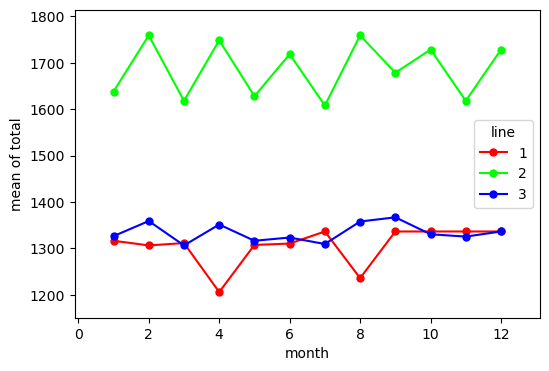

In [33]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(month,line, total,ms=10, ax=ax)

#### 교호작용 그래프 결과 해석
- 일반적으로 상호작용 그래프에서 두 선이 서로 교차하고 있을 때, x축에 있는 독립변수와 그래프에서 시각화된 독립변수 간에는 상호작용이 존재한다고 해석할 수 있다.

---

# [ 26회 ]

## < 26회 1번 : 모비율 관련, 최소 표본 크기 > 
철강제품의 불량률을 조사하고자 한다. 이 때, 불량률의 90%, 추정오차한계가 5% 이내가 되기 위하여 적절한 표본의 크기 중 최소값은 얼마인가?

### 접근 방법
- 불량률의 추정값이 90%일 것으로 가정하고, 그 추정값의 추정 오차 한계가 5% 이내가 되도록 표본 크기를 결정하라는 의미
- 불량률'의' 90% $\rightarrow$ '모비율' 관련 최소 표본 크기
    - 즉, 여기서 90%는 신뢰계수
- $p$ 를 모르는 경우 ($p$를 아는 경우는, 아래 처럼 표본 크기를 구할 일이 없음)
<img src="https://i.esdrop.com/d/f/3uJKEwVXJL/KhNQN7PWRW.jpg" width=650/>

In [46]:
from scipy import stats
from sympy import *
import math

# 표준정규분포 선언
# std_normal = stats.norm(0,1)
# z_val = std_normal.ppf(0.95)

confidence_level = 0.9  # 신뢰수준 (90%)
z_value = norm.ppf(1 - (1 - confidence_level) / 2)  # 임계값 계산

print(z_val) # z_val = 1.645  (신뢰계수 90%)

# 불량률
p = 0.5  # 2차식에서 p=0.5를 넣어야 최소가 됨

# n에 관한 방정식(부등식)
n = Symbol('n')

# 여기서 0.05는 그냥 추정오차한계일 뿐, 신뢰계수 95%가 아님
d = z_val * sqrt(p*(1-p)/n) - 0.05 

# 정답
answer_tmp = solve(d)[0]  # 소수점
answer_final = math.trunc(answer_tmp) + 1  # 소수점 버리고 + 1

print('실제 값: ', answer_tmp)
print('정답: ', answer_final)

# 정답
## 실제 값:  270.554345409541
## 정답:  271

1.6448536269514722
실제 값:  270.554345409541
정답:  271


## < 26회 2번 : 이동평균, 시계열 시각화 > 
아래 그래프는 1월부터 9월까지의 은의 가격이다

<img src="https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem2.png">

1. 은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라
2. 1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림

### 접근 방법
- 이동평균값 3은 rolling(window=3).mean() 이용 !

In [21]:
import pandas as pd 
import numpy as np

df = pd.read_csv("../Data/26_problem4.csv")
df

,1M,2M,3M,4M,5M,6M,7M,8M,9M
0,12.14,42.6,34.4,35.29,30.96,57.12,37.84,42.49,31.38


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1M      1 non-null      float64
 1   2M      1 non-null      float64
 2   3M      1 non-null      float64
 3   4M      1 non-null      float64
 4   5M      1 non-null      float64
 5   6M      1 non-null      float64
 6   7M      1 non-null      float64
 7   8M      1 non-null      float64
 8   9M      1 non-null      float64
dtypes: float64(9)
memory usage: 200.0 bytes


### 2-1) 은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라

In [24]:
MA_data = df.transpose() 
MA_data.columns = ["month_price"]
MA_data

,month_price
1M,12.14
2M,42.60
3M,34.40
4M,35.29
5M,30.96
6M,57.12
7M,37.84
8M,42.49
9M,31.38


In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# 은의 가격 데이터의 이동평균값 3 계산
MA_data["MA3"] = MA_data["month_price"].rolling(window=3).mean()
print(MA_data)

    month_price        MA3
1M        12.14        NaN
2M        42.60        NaN
3M        34.40  29.713333
4M        35.29  37.430000
5M        30.96  33.550000
6M        57.12  41.123333
7M        37.84  41.973333
8M        42.49  45.816667
9M        31.38  37.236667


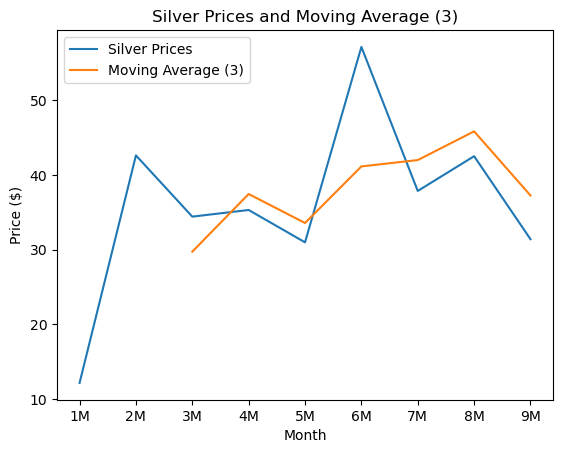

In [28]:
# 시계열 그래프 그리기
fig, ax = plt.subplots()
ax.plot(MA_data["month_price"], label='Silver Prices')
ax.plot(MA_data["MA3"], label='Moving Average (3)')

ax.set_xlabel('Month')
ax.set_ylabel('Price ($)')
ax.set_title('Silver Prices and Moving Average (3)')

ax.legend()
plt.show()

### 2-2) 1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림
- A 대비 B의 증가율 = (B값 - A 값) / A값 * 100

In [29]:
# 1월과 9월의 가격
price_jan = MA_data["month_price"][0]
price_sep = MA_data["month_price"][-1]


# 증감률 계산
# A 대비 B의 증가율 = (B값 - A 값) / A값 * 100
change = (price_sep - price_jan) / price_jan * 100

# 반올림하여 출력
print(round(change, 1))

158.5


## < 26회 3번 : 동질성 검정, 카이제곱 검정 >
아래 그래프는 A,B,C 자치구별 W 의원에 대한 찬성, 반대 지지를 나타낸다. 자치구별 지지율이 같은지에 대해서 검정하라
<img src="https://user-images.githubusercontent.com/119478998/237022541-b0af58eb-e31e-4c89-bdab-92b337014a71.png" width=300>

1. 연구가설과 귀무가설을 설정하라
2. 검정통계량 구하고 결론을 내라

### 접근 방법
#### 두 범주형 변수에 대한 검정 $\rightarrow$ 카이제곱
- 자치구별 지지율 동일한지 검정, 즉 행과 행의 관련성이므로 동질성에 가깝다고 생각함

### 3-1) 연구가설과 귀무가설을 설정하라.
- 귀무가설 : A, B, C 자치구별 W 의원에 대한 찬성, 반대 지지의 지지율은 모두 같다.
- 대립가설 : A, B, C 자치구별 W 의원에 대한 찬성, 반대 지지의 지지율 중 적어도 하나는 다르다.

In [9]:
df = pd.DataFrame({"vote" :["찬성","반대"],
                    "A" : [176,124],
                    "B" : [193,107],
                    "C" : [159,141]})
df 

,vote,A,B,C
0,찬성,176,193,159
1,반대,124,107,141


In [10]:
# 교차표를 만들어 주기 위해 인덱스 설정
df.set_index("vote",inplace=True)
df

,A,B,C
vote,,,
찬성,176,193,159
반대,124,107,141


### 3-2) 검정통계량 구하고 결론을 내라

In [11]:
# 카이제곱 검정을 통한 동질성 검정 수행
from scipy.stats import chi2_contingency

chi2, p, df, expect = chi2_contingency(df) 

# chi2_contingency(df)

print("검정통계량 : ", round(chi2, 5))
print("p-value : ", round(p, 5))

검정통계량 :  7.94538
p-value :  0.01882


#### p-value가 0.01882로 유의수준 0.05보다 작으므로 귀무가설을 기각한다.
#### 따라서 A, B, C 자치구별 W 의원에 대한 찬성, 반대 지지의 지지율 중 적어도 하나는 다르다고 할 수 있다.

## < 26회 4번 : 독립 표본 t검정, 신뢰구간 >
A초등학교 남학생 16명과 여학생 9명의 혈압을 측정한 pressure.csv파일을 가지고 남녀학생의 평균 혈압에 차이가 없는지 분석하라. 단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정한다.

1. 연구가설과 귀무가설을 설정하라
2. 통계량을 구하고, 연구가설 채택여부를 기술하라.
3. 6.2 에서 구한 검정 통계량 값을 바탕으로 신뢰구간을 구하라

## < 26회 5번 : 베이지안 회귀 >
height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하라
- A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다.
- 이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보고자 한다.

4-1. 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.
- 베이지안 회귀
- 시드넘버 1234로 지정
- 1000번의 burn-in 이후 10,000의 MCMC를 수행
- 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. (이 때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정)

4-2. 위에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라.

In [31]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem7.csv')
df.head()

,height,weight,waistline
0,174.396,72.102,79.3787
1,179.656,81.255,80.6649
2,175.079,76.207,80.3166
3,180.804,81.354,80.8794
4,177.448,78.768,80.3499


### 5-1) 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.
- 베이지안 회귀
- 시드넘버 1234로 지정
- 1000번의 burn-in 이후 10,000의 MCMC를 수행
- 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. (이 때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정)

### 5-2. 위에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라.

---

# [ 25회 ]

- 여러 통계 문제 (각 5점씩 총 20점)

## < 25회 1-1번 : 조화평균 >
서울에서 영동까지 100km/h로 가고 영동에서 서울까지 80km/로 돌아왔을 때, 평균 속도는?

## < 25회 1-2번 : 기하평균 >
연매출이 3000, 4000, 5000이었다면 연평균 몇배가 증가한 것인가?

## < 25회 1-3번 : 조건부 확률 >
남성, 여성의 등산, 수영에 대한 취미 선호도 빈도표(2x2)를 보고, 남성 중에서 등산을 좋아할 확률을 구하시오.

## < 25회 1-4번 : 모분산 신뢰구간 추정 >
표본 10개의 분산이 90일 때 신뢰도 95%로 모분산의 신뢰구간을 추정

### 접근 방법
- 모분산의 신뢰구간 추정은 카이제곱과 연관 !
<img src="https://i.esdrop.com/d/f/3uJKEwVXJL/hhZ8I83b6n.jpg" width=300/>

## < 25회 2번 : paired t-test (대응표본 t검정) >
임상 대상 20명에 대해 혈압약 투약 이전과 이후의 차이가 24, 표준편차 9  신뢰구간 95%, 차이가 존재하는지 확인하려한다

1. 귀무가설과 연구가설을 제시하시오.
2. 검정 후 귀무가설 기각 여부 제시

## < 25회 3번 : 크루스컬 윌리스 검정 >
공장 X, Y, Z의 평균 출하 소요시간을 여러 일자에 거쳐 측정한 데이터이다. 각 공장의 중위수의 차이가 존재하는지 확인하려 한다.

1. 귀무가설과 연구가설을 제시하시오
2. 검정 후 귀무가설 기각 여부 제시

In [16]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem5.csv',encoding='cp949')
df.head()

,출하 소요시간,공장명,공장별 출하 소요시간 순위
0,71,Z,11
1,75,X,14
2,71,X,12
3,53,Z,1
4,50,X,1


### 접근 방법 
#### 3개 이상 표본 & '순위'가 들어간 서열 척도 데이터 $\rightarrow$ 크루스컬 윌리스 검정
- 비모수 검정 
- 독립변수는 범주형변수고 종속변수는 연속형변수 $\rightarrow$ One way ANOVA
    - 정규성을 따르면 One way ANOVA로 평균 비교했을 것
    - '중위수'로 비교하므로 정규성을 만족하지 못한다고 판단 $\rightarrow$ 크루스칼로 문제 풀이
    
1. 집단별로 원데이터(출하 소요시간) 분할해주기
    - 순위는 trick
2. 집단별 데이터로 kruskal 검정 실행

###  3-1) 귀무가설과 연구가설을 제시하시오.
- 귀무가설 : 공장 X, Y, Z의 평균 출하 소요시간의 중위수는 모두 같다.
- 대립가설 : 공장 X, Y, Z의 평균 출하 소요시간의 중위수 중 적어도 하나가 다르다. (적어도 하나는 ~ 차이가 있다.)

## 3-2) 검정 후 귀무가설 기각 여부 제시

In [17]:
from scipy.stats import kruskal

# 각 공장의 데이터 추출
factory_X = df[df['공장명'] == 'X']['출하 소요시간']
factory_Y = df[df['공장명'] == 'Y']['출하 소요시간']
factory_Z = df[df['공장명'] == 'Z']['출하 소요시간']

# 크루스칼-윌리스 검정 수행
statistic, p_value = kruskal(factory_X, factory_Y, factory_Z)

# 결과 출력
print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 0.7217886080379153
p-value: 0.6970526702392181


#### p-value 값이 0.697로 유의수준 0.05보다 크므로, 귀무가설을 기각할 수 없다.
#### 따라서 공장 X, Y, Z의 평균 출하 소요시간의 중위수는 모두 같다고 할 수 있다.